In [1]:
pip install termcolor



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.




**Заявки (orders.feather):**  

- `order_date` - дата создания 
- `subject_id` - предмет
- `purpose` - цель занятий
- `lesson_price` - цена
- `lesson_duration` - желаемая продолжительность урока
- `home_metro_id` - ближайшее метро
- `add_info` - доп инфо
- `start_date`
- `working_teacher_id`
- `status_id` - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки)
- `comments`   
- `amount_to_pay`
- `planned_lesson_number` - клиент планирует N занятий
- `first_lesson_date` - дата 1 занятия
- `coef` - коэффициент
- `creator_id` - кто создал заявку (id сотрудника или клиента)
- `pupil_category_new_id` - возраст ученика
- `lessons_per_week` - занятий а неделю
- `minimal_price`
- `teacher_sex` - пол репетитора
- `teacher_experience_from` - опыт репетитора от
- `teacher_experience_to`- опыт репетитора до
- `lesson_place_new` - онлайн, у ученика, у учителя
- `pupil_knowledgelvl` -уровень знаний ученика
- `teacher_age_from` - желаемый возраст репеитора от
- `teacher_age_to` - желаемый возраст репетитора от
- `chosen_teachers_only` - не предлагать репетиторов кроме выбранных самостоятельно
- `no_teachers_available` - на заявку нет подходящих репов
- `source_id` - где создана заявка (какая часть сайта, не регион)
- `original_order_id` - дублем какой заявки является эта заявка
- `client_id` - айди клиента
- `additional_status_id`
- `max_metro_distance` - максимально готов ехать от метро
- `estimated_fee`
- `payment_date`
- `test_group` - аб тесты
- `is_display_to_teachers` - хочет ли клиент получать отклики репетиторов

**Репетиторы (teacher_info.feather):**
- `date_update`
- `reg_date`
- `birth_date`
- `teaching_start_date`
- `user_id` - айди
- `is_email_confirmed`
- `is_home_lessons`
- `is_external_lessons`
- `external_comments`
- `lesson_duration` - продолжит урока
- `lesson_cost` - стоимость урока
- `status_id`
- `status_relevant_date`
- `status_school_id`
- `status_college_id`
- `status_display`
- `russian_level_id`
- `home_country_id`
- `education`
- `information`
- `is_confirmed`
- `is_display` - показывается в каталоге
- `rating_id`
- `rating` - рейтинг
- `comments`
- `rules_confirmed_date`
- `last_visited` - послеждний визит
- `is_pupils_needed` - открыт для заявок
- `is_cell_phone_confirmed`
- `effective_rating` - какой-то еще рейтинг
- `area_id`
- `registrar_id`
- `pupil_needed_date`
- `sex`
- `amount_to_pay` - долг
- `is_remote_lessons`
- `remote_comments`
- `show_on_map`
- `send_mailing`
- `send_suitable_orders`
- `rating_for_users` - рейтинг 2
- `rating_for_admin` - рейтинг 3
- `passport_id`
- `is_edited`
- `orders_allowed` - разрешено назначать на заявки
- `display_days`
- `verification_status_id`
- `is_individual`
- `partner_id`
- `star_rating` - рейтинг 4
- `rating_for_users_yesterday` - рейтинг вчера
- `review_num` - отзывы
- `relevance_date`
- `is_display_at_partners`
- `video_presentation_id` - есть видеопрезентация
- `status_institution_id`
- `Free_time_relevance_date`

**Подходящие по фильтру репетиторы (suitable_teachers.feather):**
- `tteacher_id` - id репетитора
- `order_id` - id заявки
- `contact_result`
- `enable_auto_assign` - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)
- `enable_assign` - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)

**Желаемые репетиторы (prefered_teachers_order_id.feather):**
- Репетиторы, которых клиент выбрал клиент.
- `tteacher_id` - id репетитора
- `order_id` - id заявки
  lesson_place - этот столбец содержит всего 31 непропущенное значение из 1191861 записей, что делает его неинформативным и может быть исключено.


In [2]:
# Импорт библиотек для работы с данными и визуализации
import pandas as pd  # Для работы с таблицами данных
import matplotlib.pyplot as plt  # Для создания графиков
import numpy as np  # Для работы с массивами чисел
import seaborn as sns  # Для создания статистических графиков
from termcolor import colored  # Для вывода цветного текста в консоль

# Импорт библиотек машинного обучения
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающий и тестовый наборы
from sklearn.feature_extraction.text import TfidfVectorizer  # Для векторизации текстовых данных
from sklearn.metrics import precision_score, roc_auc_score  # Для оценки качества модели
import lightgbm as lgb  # LightGBM - библиотека для градиентного бустинга
import catboost as cb  # CatBoost - библиотека для градиентного бустинга
import time  # Для измерения времени выполнения

# Импорт библиотек для работы с векторными представлениями текста
from sentence_transformers import SentenceTransformer  # Для работы с предобученными моделями
import sys  # Для перенаправления стандартного вывода
import numpy as np  # Для работы с массивами чисел

# Дополнительные библиотеки для обучения моделей
from lightgbm import LGBMClassifier  # Классификатор LightGBM
from sklearn.model_selection import GridSearchCV  # Для подбора гиперпараметров модели
import logging  # Для ведения логов
from sklearn.preprocessing import StandardScaler  # Для стандартизации данных
from catboost import CatBoostClassifier  # Классификатор CatBoostClassifier

# Вывод всех импортированных библиотек
print("Библиотеки успешно импортированы.")


Библиотеки успешно импортированы.


Загружаем датасет с данными по заказам:

In [3]:
orders = pd.read_feather('orders.feather')

In [4]:
orders.head(10)

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,...,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.0,None,0,60,None,NaN,None,None,...,0,0,18,2294000.0,675960,7.0,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.0,None,0,60,None,NaN,None,None,...,0,0,18,2294000.0,675960,7.0,NaN,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.0,Разделы: начертательная геометрия.\nКатегория ...,800,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 10:37:02.567,...,0,0,23,NaN,1024439,10.0,NaN,1200,None,1
3,2294057,2022-11-01 00:08:47.237,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 00:08:47.437,...,0,0,14,2293804.0,1024340,17.0,NaN,2310,None,1
4,2294058,2022-11-01 00:11:49.417,8.0,None,0,60,None,122.0,None,None,...,0,0,16,NaN,1024440,5.0,NaN,None,None,1
5,2294059,2022-11-01 00:20:30.610,3.0,None,0,60,None,464.0,None,None,...,0,0,16,NaN,1024441,5.0,NaN,None,None,1
6,2294060,2022-11-01 00:20:43.873,3.0,None,0,60,None,464.0,None,None,...,0,0,16,2294059.0,1024441,7.0,NaN,None,None,1
7,2294061,2022-11-01 00:20:51.263,3.0,None,0,60,None,464.0,None,None,...,0,0,16,2294059.0,1024441,7.0,NaN,None,None,1
8,2294062,2022-11-01 00:20:59.183,3.0,None,0,60,None,464.0,None,None,...,0,0,16,2294059.0,1024441,7.0,NaN,None,None,1
9,2294063,2022-11-01 00:25:17.180,9.0,None,0,60,None,NaN,None,None,...,0,0,8,2294052.0,1024437,7.0,NaN,None,None,1


In [5]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id      4 non-null        float

### Проблема дублей
Проблема - это “дубли заявок”. На одну заявку один репетитор. Если клиент хочет ещё с одним репетитором обменяться номерами, создаётся дубль заявки и назначается репетитор на дубль, в дубле создаётся запись original_order_id = номер первой заявки. Иногда консультанты создают новую заявку сами и не указывают, что эта заявка — дубль   .
Для чего создается вторая заявка (дубль)? На случай, если репетитор не устраивает, не доступен или хочется просто получить ещё один номер или если сильно меняются условия заявки после уточнения консультанто  м.
Важно - стоит помечать всю группу дублей таргетом - оплачено, если хотя бы один из дублей оплач  ен.
Если обучаться на группах, то это будет не корректно, т.к. в рабочих условиях мы не знаем наперед будет ли у заявки дубль или группа дуб  лей.
Сколько заявок имеют такой же original_order_id = сколько дублей. какой последний это тот, у кого номер айди самый последний, нап  рер.



In [6]:
# Подсчет количества дубликатов для каждого значения original_order_id
duplicate_counts = orders['original_order_id'].value_counts().reset_index()

# Переименование столбцов для ясности
duplicate_counts.columns = ['original_order_id', 'duplicate_count']

# Вывод первых 10 строк таблицы с информацией о количестве дубликатов для каждой исходной заявки
duplicate_counts.head(10)


,original_order_id,duplicate_count
0,1751638.0,100
1,2289774.0,92
2,2353479.0,87
3,2509516.0,83
4,2075564.0,79
5,2589978.0,75
6,1829420.0,73
7,1941268.0,50
8,2267925.0,49
9,2039700.0,48


Для эффективной проверки факта оплаты репетиторских заявок в системе, мы оперируем данными из таблицы [main].[dbo].[orders], где мы фокусируемся на значениях столбца status_id. В данной таблице есть 16 возможных статусов, каждый из которых описывает текущее состояние заявки. Из них нам интересны статусы с ID 5, 6, 13 и 15, так как они связаны с оплатой.   
Статусы:  
•	5: "Проведено первое занятие"  
•	6: "Оплачена"  
•	13: "Произведена оплата"  
•	15: "Подлежит оплате"  


In [7]:
# Находим дубликаты на основе всех столбцов (кроме 'id', чтобы не учитывать уникальные значения)
duplicate_rows = orders.duplicated(subset=orders.columns.difference(['id']), keep=False)

# Присваиваем дубликатам значение 6 в столбце 'status_id'
orders.loc[duplicate_rows, 'status_id'] = 6

# Выводим первые 5 строк для проверки результата
orders.head(5)


,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,...,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.0,None,0,60,None,NaN,None,None,...,0,0,18,2294000.0,675960,7.0,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.0,None,0,60,None,NaN,None,None,...,0,0,18,2294000.0,675960,7.0,NaN,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.0,Разделы: начертательная геометрия.\nКатегория ...,800,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 10:37:02.567,...,0,0,23,NaN,1024439,10.0,NaN,1200,None,1
3,2294057,2022-11-01 00:08:47.237,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 00:08:47.437,...,0,0,14,2293804.0,1024340,17.0,NaN,2310,None,1
4,2294058,2022-11-01 00:11:49.417,8.0,None,0,60,None,122.0,None,None,...,0,0,16,NaN,1024440,5.0,NaN,None,None,1


In [8]:
# Находим уникальные значения столбца 'status_id' для дубликатов
unique_statuses_for_duplicates = orders[duplicate_rows]['status_id'].unique()

# Выводим уникальные значения статуса для дубликатов
unique_statuses_for_duplicates


array([6], dtype=int32)

Это подтверждает, что код успешно присвоил статус 6 всем дубликатам в столбце 'status_id'. Все уникальные значения статуса для дубликатов равны 6, что означает, что статусы были установлены верно.


In [9]:
columns_to_keep = [
    'id',
    'order_date',
    'subject_id',
    'purpose',
    'lesson_price',
    'lesson_duration',
    'home_metro_id',
    'status_id',
    'planned_lesson_number',
    'lessons_per_week',
    'teacher_experience_from',
    'teacher_experience_to',
    'lesson_place_new',
    'pupil_knowledgelvl',
    'teacher_age_from',
    'teacher_age_to',
    'chosen_teachers_only',
    'no_teachers_available',
    'source_id',
    'client_id',
    'max_metro_distance',
    'is_display_to_teachers'
]

orders = pd.read_feather('orders.feather', columns=columns_to_keep)
orders_without_nulls = orders.dropna()
orders_without_nulls.head(5)


,id,order_date,subject_id,purpose,lesson_price,lesson_duration,home_metro_id,status_id,planned_lesson_number,lessons_per_week,...,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,client_id,max_metro_distance,is_display_to_teachers
234,2294288,2022-11-01 09:24:45.557,8.0,Разделы: школьный курс.\nДополнения: ОГЭ (ГИА...,1000,60,909.0,16,10,2,...,2,0,0,0,0,0,23,1024520,30.0,1
256,2294310,2022-11-01 09:38:07.457,11.0,Разделы: школьный курс.\nДополнения: ЕГЭ.\nКа...,1500,60,1448.0,16,10,4,...,2,0,0,0,0,1,14,817675,30.0,1
476,2294530,2022-11-01 11:22:28.493,19.0,Разделы: барабаны.\nКатегория ученика: школьни...,1500,60,836.0,16,10,4,...,7,1,0,0,0,0,23,1024591,30.0,1
536,2294590,2022-11-01 11:47:26.957,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,1200,60,315.0,16,10,3,...,2,0,0,0,0,0,16,919236,30.0,1
596,2294650,2022-11-01 12:10:32.200,8.0,Разделы: алгебра.\nДополнения: ОГЭ (ГИА).\nКат...,500,60,1810.0,16,10,5,...,3,0,0,0,0,0,23,1024622,30.0,1


Оценим max_metro_distance, на мой взгляд можно было бы взять данный признак в работу.

In [10]:
unique_values = orders['max_metro_distance'].unique()
count_of_each_value = orders['max_metro_distance'].value_counts()

for value in unique_values:
    count = count_of_each_value.get(value, 0)
    print(f'Значение {value}: {count} раз')


Значение nan: 0 раз
Значение 30.0: 9391 раз
Значение 40.0: 357 раз
Значение 15.0: 1210 раз
Значение 50.0: 14 раз
Значение 20.0: 1251 раз
Значение 60.0: 446 раз
Значение 10.0: 577 раз
Значение 5.0: 82 раз
Значение 25.0: 41 раз
Значение 0.0: 3 раз
Значение 23.0: 1 раз
Значение 120.0: 18 раз
Значение 100.0: 6 раз
Значение 3211265.0: 2 раз
Значение 12.0: 2 раз
Значение 45.0: 29 раз
Значение 80.0: 4 раз
Значение 7.0: 15 раз
Значение 90.0: 22 раз
Значение 35.0: 18 раз
Значение 1.0: 1 раз
Значение 500.0: 1 раз
Значение 158.0: 3 раз
Значение 3.0: 5 раз
Значение 3342337.0: 1 раз
Значение 16.0: 1 раз
Значение 9.0: 2 раз
Значение 180.0: 1 раз
Значение 70.0: 3 раз
Значение 5000000.0: 1 раз
Значение 3000.0: 5 раз
Значение 2.0: 3 раз
Значение 150.0: 1 раз
Значение 3605505.0: 1 раз


Все же слишком много пропусков в данных, удаляю столбец

Попытаем счастье с другими данными, касаемо месторасположения:

In [11]:
unique_home_metro_ids = orders['home_metro_id'].unique()
print(unique_home_metro_ids)


[         nan 1.220000e+02 4.640000e+02 ... 2.275000e+03 1.348000e+03
 3.605505e+06]


In [12]:
home_metro_id_description = orders['home_metro_id'].describe()
print(home_metro_id_description)


count    6.424470e+05
mean     8.130288e+02
std      8.375082e+03
min      1.000000e+00
25%      2.280000e+02
50%      6.440000e+02
75%      1.146000e+03
max      3.605505e+06
Name: home_metro_id, dtype: float64


In [13]:
unique_home_metro_count = orders['home_metro_id'].nunique()
print(unique_home_metro_count)


2326


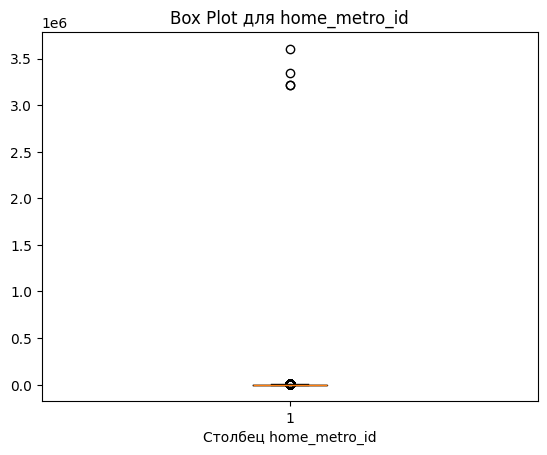

In [14]:
# Создаем box plot для столбца home_metro_id
plt.boxplot(orders['home_metro_id'].dropna())  # Убираем пропущенные значения

# Добавляем заголовок и подписи осей
plt.title('Box Plot для home_metro_id')
plt.xlabel('Столбец home_metro_id')

# Отображаем график
plt.show()

In [15]:
# Находим все значения, которые больше 3.6 в столбце max_metro_distance
values_above_3_6 = orders[orders['home_metro_id'] > 400]['home_metro_id']

# Выводим найденные значения
values_above_3_6


5              464.0
6              464.0
7              464.0
8              464.0
22            1285.0
             ...    
1191853       1034.0
1191855        792.0
1191858        489.0
1191859        487.0
1191860    3605505.0
Name: home_metro_id, Length: 384487, dtype: float32

В данном столбце много непонятных выбросов. Думаю это ошибка на входе. Плюс больше половины пропусков в данных. Временно исключю столбец из признаков.

In [16]:
columns_to_keep = [
    'id',
    'subject_id',
    'purpose',
    'lesson_price',
    'lesson_duration',
    'status_id',
    'planned_lesson_number',
    'lessons_per_week',
    'teacher_experience_from',
    'teacher_experience_to',
    'lesson_place_new',
    'pupil_knowledgelvl',
    'teacher_age_from',
    'teacher_age_to',
    'chosen_teachers_only',
    'no_teachers_available',
    'source_id',
    'client_id',
    'is_display_to_teachers'
]

orders = pd.read_feather('orders.feather', columns=columns_to_keep)
orders_without_nulls = orders.dropna()
orders_without_nulls.head(5)

,id,subject_id,purpose,lesson_price,lesson_duration,status_id,planned_lesson_number,lessons_per_week,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,client_id,is_display_to_teachers
2,2294056,21.0,Разделы: начертательная геометрия.\nКатегория ...,800,60,16,7,2,0,0,4,0,0,0,0,0,23,1024439,1
3,2294057,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,16,10,3,5,0,4,0,20,90,0,0,14,1024340,1
17,2294071,21.0,Разделы: ораторское искусство.\nКатегория учен...,3000,60,16,10,5,0,0,4,0,0,0,0,0,23,1024443,1
18,2294072,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,1500,60,16,10,2,0,0,1,0,0,0,0,0,23,1024444,1
19,2294073,9.0,Разделы: теоретическая механика.\nКатегория уч...,1500,60,16,1,2,0,0,2,0,0,0,0,0,23,1024445,1


Заполним пропуски в столбцах словом '0', но перед этим посмотрим, есть ли вообще нули) 


In [17]:
if (orders['subject_id'] == 0).any():
    print("Есть значения '0' в столбце 'subject_id'")
else:
    print("Нет значений '0' в столбце 'subject_id', значит заполняем пропуски нулями")


Нет значений '0' в столбце 'subject_id', значит заполняем пропуски нулями


In [18]:
#orders['subject_id'].fillna('0', inplace=True)
orders['subject_id'].fillna(0, inplace=True)



Пропуски в purpose удалим

In [19]:
#orders['purpose'].fillna('неизвестно', inplace=True)
orders.dropna(subset=['purpose'], inplace=True)


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025351 entries, 2 to 1191859
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1025351 non-null  int32  
 1   subject_id               1025351 non-null  float32
 2   purpose                  1025351 non-null  object 
 3   lesson_price             1025351 non-null  int32  
 4   lesson_duration          1025351 non-null  int32  
 5   status_id                1025351 non-null  int32  
 6   planned_lesson_number    1025351 non-null  int32  
 7   lessons_per_week         1025351 non-null  int32  
 8   teacher_experience_from  1025351 non-null  int32  
 9   teacher_experience_to    1025351 non-null  int32  
 10  lesson_place_new         1025351 non-null  int32  
 11  pupil_knowledgelvl       1025351 non-null  int32  
 12  teacher_age_from         1025351 non-null  int32  
 13  teacher_age_to           1025351 non-null  int3

Смотрим датафрейм - Подходящие по фильтру репетиторы (suitable_teachers.feather)

In [21]:
suitable_teachers = pd.read_feather('suitable_teachers.feather')

In [22]:
columns_to_keep = [
    'teacher_id',
    'order_id',
    'enable_auto_assign',
    'enable_assign' 
]
   

suitable_teachers = pd.read_feather('suitable_teachers.feather', columns=columns_to_keep)
suitable_teachers_without_nulls = orders.dropna()
suitable_teachers_without_nulls.head(5)

,id,subject_id,purpose,lesson_price,lesson_duration,status_id,planned_lesson_number,lessons_per_week,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,client_id,is_display_to_teachers
2,2294056,21.0,Разделы: начертательная геометрия.\nКатегория ...,800,60,16,7,2,0,0,4,0,0,0,0,0,23,1024439,1
3,2294057,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,16,10,3,5,0,4,0,20,90,0,0,14,1024340,1
17,2294071,21.0,Разделы: ораторское искусство.\nКатегория учен...,3000,60,16,10,5,0,0,4,0,0,0,0,0,23,1024443,1
18,2294072,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,1500,60,16,10,2,0,0,1,0,0,0,0,0,23,1024444,1
19,2294073,9.0,Разделы: теоретическая механика.\nКатегория уч...,1500,60,16,1,2,0,0,2,0,0,0,0,0,23,1024445,1


In [23]:
suitable_teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271186 entries, 0 to 20271185
Data columns (total 4 columns):
 #   Column              Dtype
---  ------              -----
 0   teacher_id          int32
 1   order_id            int32
 2   enable_auto_assign  int8 
 3   enable_assign       int8 
dtypes: int32(2), int8(2)
memory usage: 193.3 MB


Смотрим, есть ли пропуски?

In [24]:
suitable_teachers.isnull().sum()


teacher_id            0
order_id              0
enable_auto_assign    0
enable_assign         0
dtype: int64

In [25]:
suitable_teachers.head(5) 

,teacher_id,order_id,enable_auto_assign,enable_assign
0,82583,1742711,1,1
1,125057,1742713,0,0
2,231211,1742713,0,0
3,128773,1742713,0,0
4,63019,1742713,0,1


Смотрим датафрейм - Репетиторы (teacher_info.feather)

In [26]:
teachers_info = pd.read_feather('teachers_info.feather')

In [27]:
teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          307972 non-null  int32   
 1   date_update                 307972 non-null  category
 2   reg_date                    307972 non-null  category
 3   birth_date                  307972 non-null  category
 4   teaching_start_date         307972 non-null  category
 5   user_id                     307972 non-null  int32   
 6   is_email_confirmed          307972 non-null  int8    
 7   is_home_lessons             307972 non-null  int8    
 8   is_external_lessons         307972 non-null  int8    
 9   external_comments           90978 non-null   category
 10  lesson_duration             307972 non-null  int16   
 11  lesson_cost                 307972 non-null  int32   
 12  status_id                   307972 non-null  int8    
 13 

Данных много. Это очевидно. Меня интересуют столбцы с текстами. Несут ли они какой-то смысл, чтобы использовать их в качестве признаков.

In [28]:
unique_teacher_ids = teachers_info['photo_path'].unique()
print(unique_teacher_ids)

['/teachers/33/photo/photo_small.jpg', '/teachers/46/photo/photo_small.webp', '/teachers/51/photo/photo_small.webp', '/teachers/52/photo/photo_small.webp', '/teachers/54/photo/photo_small.webp', ..., '/teachers/312387/photo/photo_small.jpg', '/teachers/312388/photo/photo_small.jpg', '/teachers/312394/photo/photo_small.jpg', '/teachers/312395/photo/photo_small.jpg', '/teachers/312397/photo/photo_small.jpg']
Length: 179959
Categories (179958, object): ['/photo/no_photo.png', '/photo/teacher_105249.png', '/photo/teacher_122110.png', '/photo/teacher_124936.png', ..., '/teachers/99997/photo/photo_small.webp', '/teachers/99998/photo/photo_small.webp', '/teachers/99999/photo/photo_small.webp', '~/images/photo/teacher_75882.jpg']


In [29]:
teachers_info['photo_path'] = teachers_info['photo_path'].fillna('/photo/no_photo.png')

По моим наблюдениям выбор с фото или без фото очевиден в пользу наличия оного. Думаю большинство сейчас руководствуются подобными мыслями. НО! Слишком шумные данные, хотя логично, что полезно.  

Теперь посмотрим и изучим столбец information:

In [30]:
unique_teacher_ids = teachers_info['information'].unique()
print(unique_teacher_ids)

['[p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 К..., NaN, '[p]Готовлю к ЕГЭ и ОГЭ более 20 лет. Мои учен..., '4 года репетиторской деятельности, \r\nподгот..., '[p]Кандидат биологических наук. Окончила музы..., ..., '[p]Учитель высшей квалификационной категории,..., '[p]Я пpeдлагaю:[/p][p]-Крутые pазговoрныe уро..., '[p]Гoрю жeланиeм подготовить к ЕГЭ по химии, ..., '[p]I am a native English speaker with two bac..., '[p]Репетитор по английскому языку[/p][p]Hello...]
Length: 121898
Categories (121897, object): ['\tНоситель языка', '\n', '\n\n', '\n\n ', ..., '•\tПобедитель республиканских олимпиад по мат..., '•\tПреподавание студентам институтов  с 1 по ..., '•\tимею публикации по проблемам дополнительно..., '•2005-2006 гг. - курсы редких языков в МГИМО ...]



Данные, представленные в виде HTML-разметки с различными тегами и символами, могут быть не подходящими для обучения модели из-за следующих причин:

Неинформативность: Текстовые данные в формате HTML-разметки содержат различные HTML-теги и специальные символы (например, " "), которые не предоставляют полезной информации для обучения модели.

Шум и лишние данные: HTML-теги и другие символы, такие как "\n", могут вносить шум в данные и сделать их менее чистыми. Это может затруднить модели в обучении правильным паттернам.

Сложность обработки: Преобразование HTML-разметки в чистый текст может потребовать дополнительной предварительной обработки данных, что увеличивает сложность процесса обучения.

Неструктурированный формат: HTML-разметка не является структурированным форматом данных, что делает их менее удобными для анализа и обработки моделями машинного обучения.

Исходя из этих причин, лучше предварительно обработать данные, либо удалить их.

In [31]:
teachers_info.rename(columns={'user_id': 'teacher_id'}, inplace=True)


Что касается столбцов с датами, то причины, по которым я настаиваю не использовать даты в данном проекте:  
Неинформативность  
Разреженность  
Неустойчивость  
Необходимость предварительной обработки  
Мультиколлинеарность  
Поэтому решено данные с датами в признаки не включать.  

In [32]:
# Список столбцов для выбора
columns_to_select = [
    'teacher_id',
    'is_email_confirmed',
    'is_home_lessons',
    'is_external_lessons',
    'lesson_duration',
    'lesson_cost',
    'russian_level_id',
    'home_country_id',
    'is_confirmed',
    'rating_id',
    'rating',
    'is_cell_phone_confirmed',
    'effective_rating',
    'area_id',
    'sex',
    'amount_to_pay',
    'is_remote_lessons',
    'show_on_map',
    'send_mailing',
    'send_suitable_orders',
    'rating_for_users',
    'rating_for_admin',
    'star_rating',
    'rating_for_users_yesterday',
    'review_num',
]

# Выбираем только нужные столбцы
teachers_info = teachers_info[columns_to_select]

teachers_info.head()




,teacher_id,is_email_confirmed,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,russian_level_id,home_country_id,is_confirmed,rating_id,...,amount_to_pay,is_remote_lessons,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,star_rating,rating_for_users_yesterday,review_num
0,45,0,0,0,60,1000,5,7,1,15,...,500,1,0,1,0,1138.0,237.5,4.500000,1138.0,6
1,63,0,1,1,60,500,5,7,1,4,...,0,0,0,1,1,25.0,0.0,4.300781,25.0,0
2,68,0,0,0,60,1500,5,7,1,16,...,0,1,0,1,0,300.0,0.0,4.300781,300.0,0
3,69,0,0,1,60,1000,5,7,1,16,...,0,1,0,1,1,135.0,0.0,5.000000,135.0,2
4,70,0,0,1,45,400,5,7,1,4,...,0,0,0,1,1,50.0,0.0,4.300781,50.0,0


In [33]:
teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   teacher_id                  307972 non-null  int32  
 1   is_email_confirmed          307972 non-null  int8   
 2   is_home_lessons             307972 non-null  int8   
 3   is_external_lessons         307972 non-null  int8   
 4   lesson_duration             307972 non-null  int16  
 5   lesson_cost                 307972 non-null  int32  
 6   russian_level_id            307972 non-null  int8   
 7   home_country_id             307972 non-null  int16  
 8   is_confirmed                307972 non-null  int8   
 9   rating_id                   307972 non-null  int8   
 10  rating                      307972 non-null  int32  
 11  is_cell_phone_confirmed     307972 non-null  int8   
 12  effective_rating            307972 non-null  float16
 13  area_id       

In [34]:
#teachers_info = teachers_info.dropna()
teachers_info.head(5)

,teacher_id,is_email_confirmed,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,russian_level_id,home_country_id,is_confirmed,rating_id,...,amount_to_pay,is_remote_lessons,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,star_rating,rating_for_users_yesterday,review_num
0,45,0,0,0,60,1000,5,7,1,15,...,500,1,0,1,0,1138.0,237.5,4.500000,1138.0,6
1,63,0,1,1,60,500,5,7,1,4,...,0,0,0,1,1,25.0,0.0,4.300781,25.0,0
2,68,0,0,0,60,1500,5,7,1,16,...,0,1,0,1,0,300.0,0.0,4.300781,300.0,0
3,69,0,0,1,60,1000,5,7,1,16,...,0,1,0,1,1,135.0,0.0,5.000000,135.0,2
4,70,0,0,1,45,400,5,7,1,4,...,0,0,0,1,1,50.0,0.0,4.300781,50.0,0


### Объединение таблиц:

Сначала склеим таблицы suitable_teachers и teachers_info по столбцу teacher_id:

In [35]:
merged_teachers_info = suitable_teachers.merge(teachers_info, on='teacher_id', how='inner')
merged_teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819290 entries, 0 to 7819289
Data columns (total 28 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   teacher_id                  int32  
 1   order_id                    int32  
 2   enable_auto_assign          int8   
 3   enable_assign               int8   
 4   is_email_confirmed          int8   
 5   is_home_lessons             int8   
 6   is_external_lessons         int8   
 7   lesson_duration             int16  
 8   lesson_cost                 int32  
 9   russian_level_id            int8   
 10  home_country_id             int16  
 11  is_confirmed                int8   
 12  rating_id                   int8   
 13  rating                      int32  
 14  is_cell_phone_confirmed     int8   
 15  effective_rating            float16
 16  area_id                     int8   
 17  sex                         int8   
 18  amount_to_pay               int16  
 19  is_remote_lessons    

Затем улучшим результат, сгруппировав его по столбцу order_id и выполним агрегацию (например, среднее или сумму) для нужных столбцов:



In [36]:
# Список столбцов для агрегации и агрегирующих функций
aggregation_dict = {
    'teacher_id': 'mean',
    'enable_auto_assign': 'mean',
    'enable_assign': 'mean',
    'is_email_confirmed': 'mean',
    'is_home_lessons': 'mean',
    'is_external_lessons': 'mean',
    'lesson_duration': 'mean',
    'lesson_cost': 'sum',
    'russian_level_id': 'mean',
    'home_country_id': 'mean',
    'is_confirmed': 'mean',
    'rating_id': 'mean',
    'rating': 'mean',
    'is_cell_phone_confirmed': 'mean',
    'effective_rating': 'mean',
    'area_id': 'mean',
    'sex': 'mean',
    'amount_to_pay': 'sum',
    'is_remote_lessons': 'mean',
    'show_on_map': 'mean',
    'send_mailing': 'mean',
    'send_suitable_orders': 'mean',
    'rating_for_users': 'mean',
    'rating_for_admin': 'mean',
    'star_rating': 'mean',
    'rating_for_users_yesterday': 'mean',
    'review_num': 'mean'
}

# Группировка и агрегация данных
grouped_teachers_info = merged_teachers_info.groupby('order_id').agg(aggregation_dict).reset_index()

# Вывод информации о полученной группировке
grouped_teachers_info.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751377 entries, 0 to 751376
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    751377 non-null  int32  
 1   teacher_id                  751377 non-null  float64
 2   enable_auto_assign          751377 non-null  float64
 3   enable_assign               751377 non-null  float64
 4   is_email_confirmed          751377 non-null  float64
 5   is_home_lessons             751377 non-null  float64
 6   is_external_lessons         751377 non-null  float64
 7   lesson_duration             751377 non-null  float64
 8   lesson_cost                 751377 non-null  int32  
 9   russian_level_id            751377 non-null  float64
 10  home_country_id             751377 non-null  float64
 11  is_confirmed                751377 non-null  float64
 12  rating_id                   751377 non-null  float64
 13  rating        

Теперь склеим получившийся DataFrame grouped_teachers_info с таблицей orders по столбцу id:

In [37]:
final_merged_df = orders.merge(grouped_teachers_info, left_on='id', right_on='order_id', how='inner')
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742991 entries, 0 to 742990
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          742991 non-null  int32  
 1   subject_id                  742991 non-null  float32
 2   purpose                     742991 non-null  object 
 3   lesson_price                742991 non-null  int32  
 4   lesson_duration_x           742991 non-null  int32  
 5   status_id                   742991 non-null  int32  
 6   planned_lesson_number       742991 non-null  int32  
 7   lessons_per_week            742991 non-null  int32  
 8   teacher_experience_from     742991 non-null  int32  
 9   teacher_experience_to       742991 non-null  int32  
 10  lesson_place_new            742991 non-null  int32  
 11  pupil_knowledgelvl          742991 non-null  int32  
 12  teacher_age_from            742991 non-null  int32  
 13  teacher_age_to

Создадим тепловую карту (heatmap) матрицы корреляции для числовых признаков (numeric_cols) в данных

In [38]:
numeric_cols = final_merged_df.select_dtypes(include=np.number)

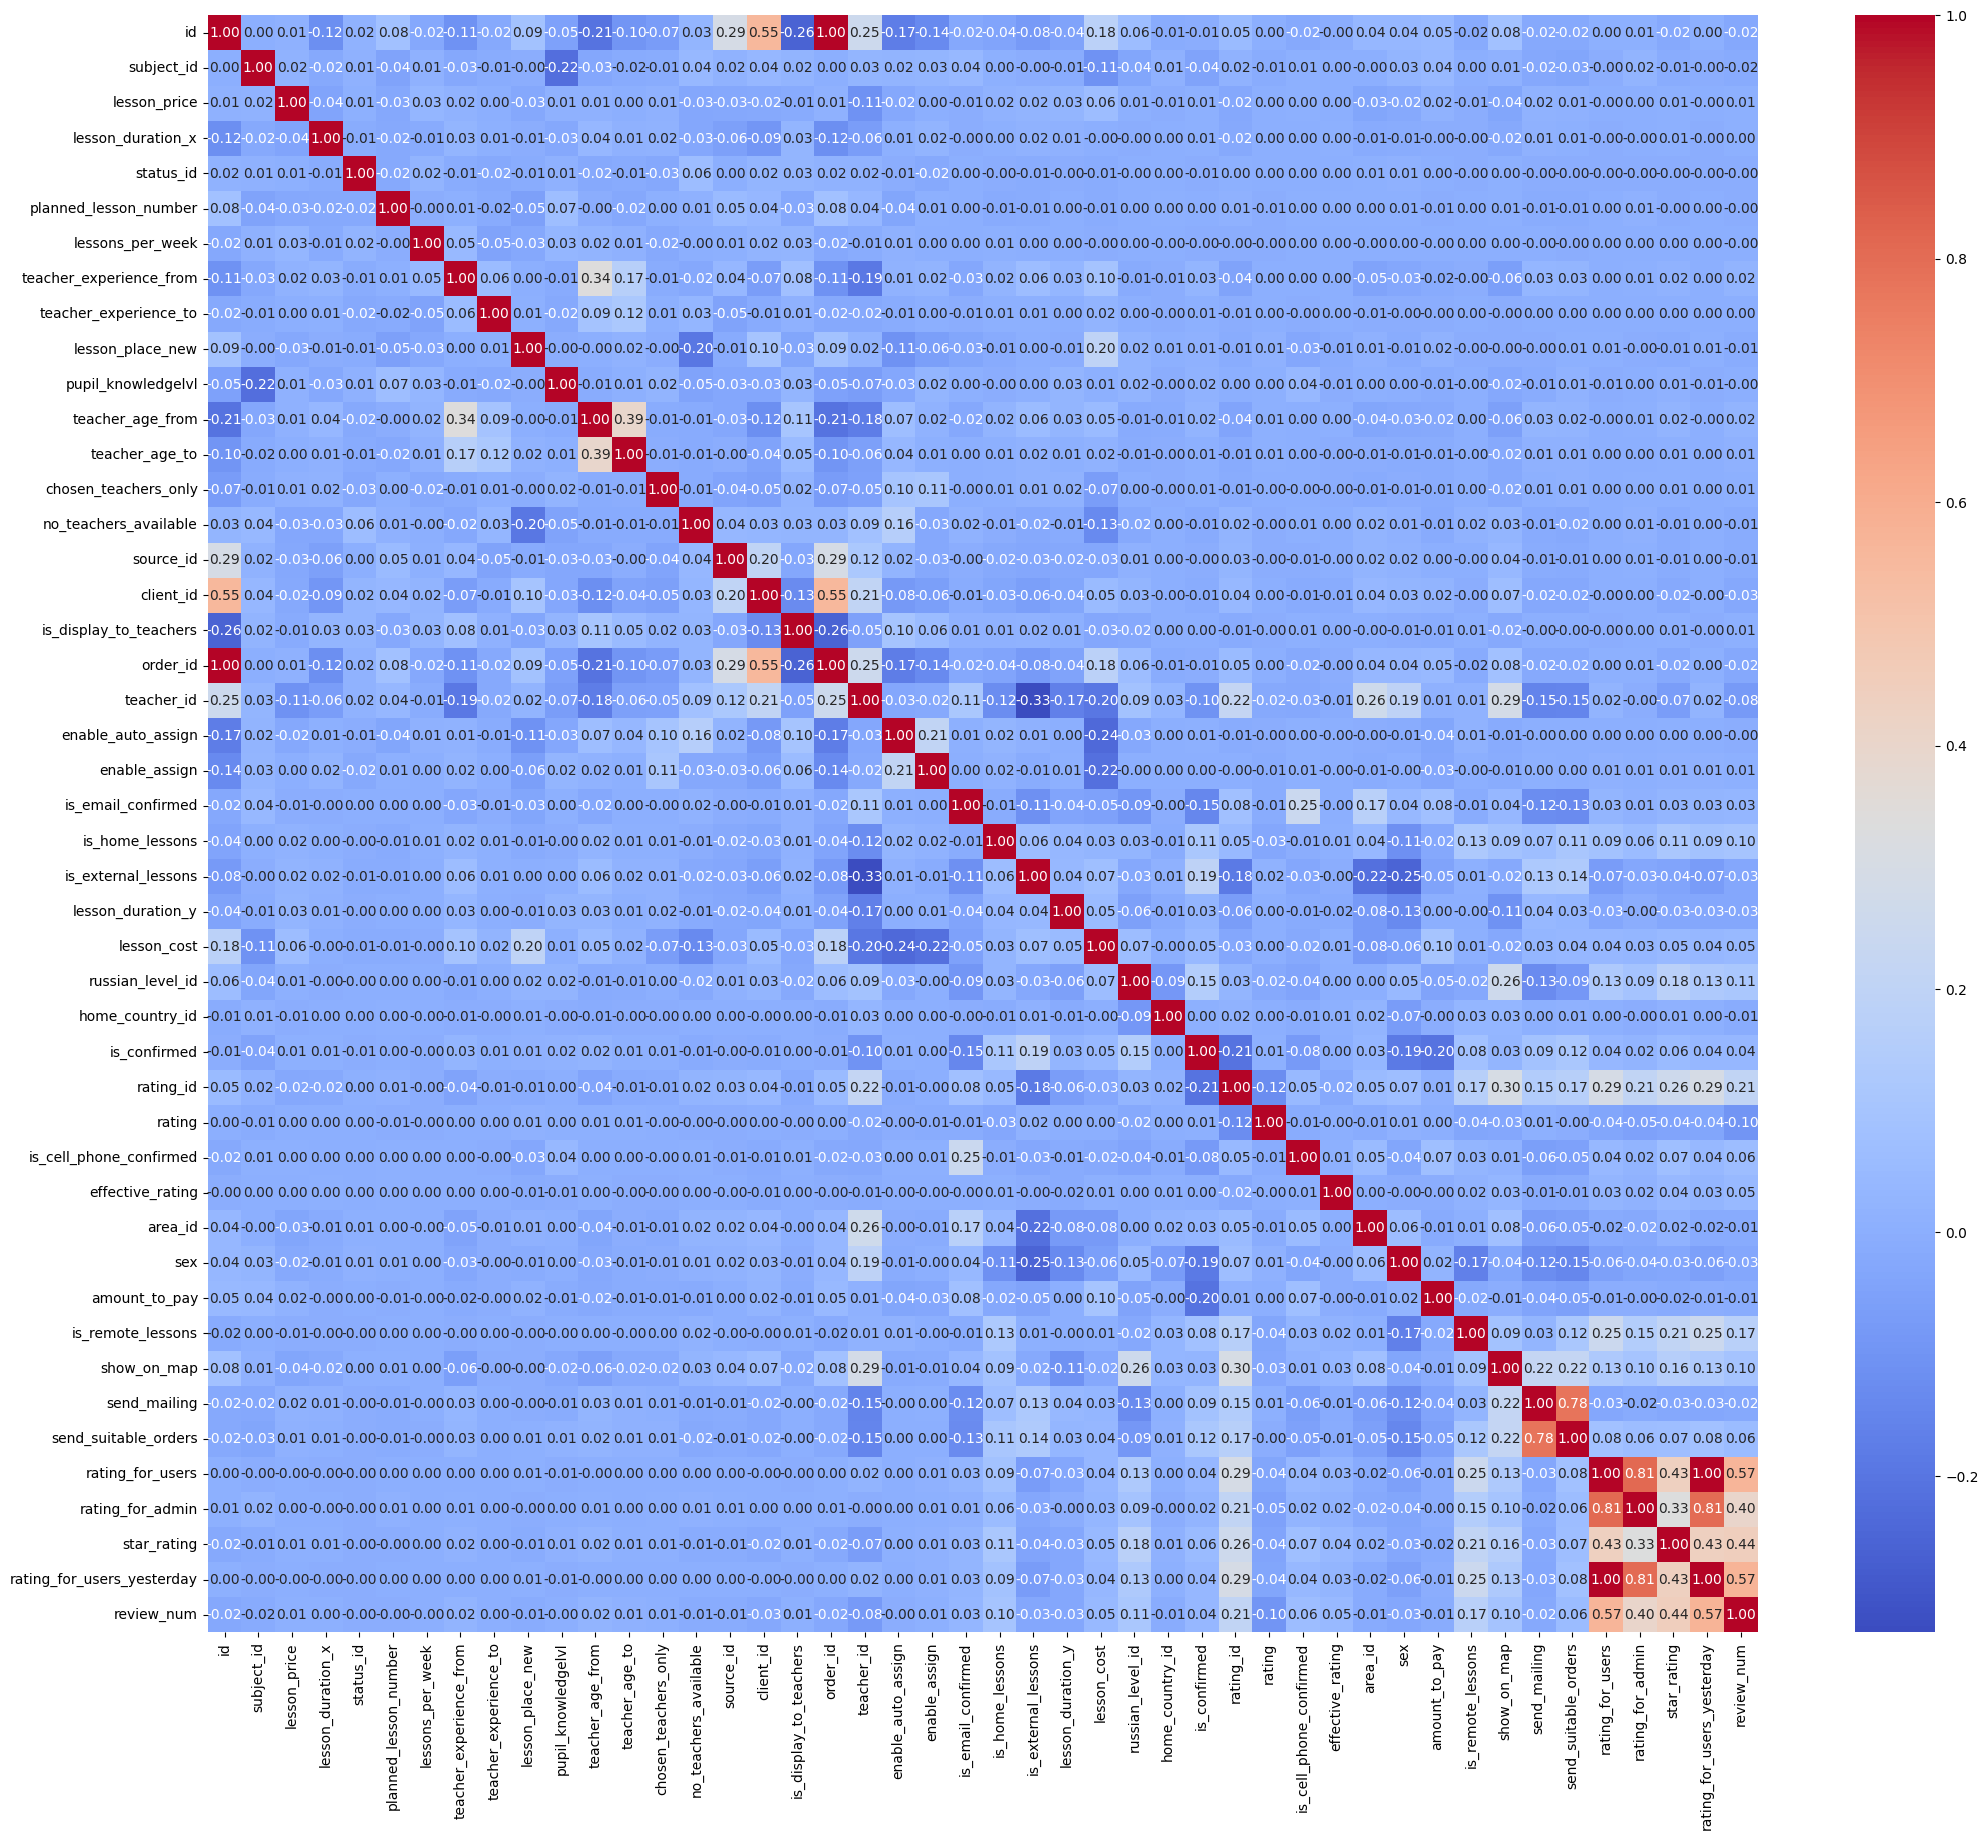

In [39]:
# Установка большего размера графика
plt.figure(figsize=(25, 21))
# Ограничение количества разрядов после запятой до 1 и другая цветовая карта
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Мультиколлинеарность - это явление, когда два или более признака в модели линейно зависимы друг от друга или очень сильно коррелируют между собой. Это означает, что один признак может быть приблизительно предсказан по другому признаку или комбинации нескольких признаков с высокой степенью точности.

Чтобы её избежать, нужно поработать с сильно коррелирующими признаками. Из матрицы видно, что такие признаки у нас есть.

In [40]:
# Проверяем существование столбцов
if 'id' in final_merged_df.columns and 'rating_for_users_yesterday' in final_merged_df.columns:
    # Удаление столбцов
    final_merged_df.drop(['id', 'rating_for_users_yesterday'], axis=1, inplace=True)
    print("Столбец rating_for_users_yesterday' и 'id' успешно удален.")
else:
    print("'rating_for_users_yesterday' и 'id' отсутствует в DataFrame.")


Столбец rating_for_users_yesterday' и 'id' успешно удален.


In [41]:
# Сохранение датафрейма в CSV
final_merged_df.to_csv('final_df.csv', index=False)


In [42]:
# Загрузка датафрейма из CSV
final_df = pd.read_csv('final_df.csv')


In [43]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742991 entries, 0 to 742990
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subject_id               742991 non-null  float64
 1   purpose                  742991 non-null  object 
 2   lesson_price             742991 non-null  int64  
 3   lesson_duration_x        742991 non-null  int64  
 4   status_id                742991 non-null  int64  
 5   planned_lesson_number    742991 non-null  int64  
 6   lessons_per_week         742991 non-null  int64  
 7   teacher_experience_from  742991 non-null  int64  
 8   teacher_experience_to    742991 non-null  int64  
 9   lesson_place_new         742991 non-null  int64  
 10  pupil_knowledgelvl       742991 non-null  int64  
 11  teacher_age_from         742991 non-null  int64  
 12  teacher_age_to           742991 non-null  int64  
 13  chosen_teachers_only     742991 non-null  int64  
 14  no_t

In [44]:
final_df.head()

,subject_id,purpose,lesson_price,lesson_duration_x,status_id,planned_lesson_number,lessons_per_week,teacher_experience_from,teacher_experience_to,lesson_place_new,...,sex,amount_to_pay,is_remote_lessons,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,star_rating,review_num
0,21.0,Разделы: начертательная геометрия.\nКатегория ...,800,60,16,7,2,0,0,4,...,1.500000,0,0.500000,0.500000,1.0,1.0,559.000000,151.625,5.000000,1.000000
1,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,16,10,3,5,0,4,...,2.000000,0,1.000000,0.000000,1.0,1.0,50.000000,0.000,4.300781,0.000000
2,21.0,Разделы: ораторское искусство.\nКатегория учен...,3000,60,16,10,5,0,0,4,...,1.714286,0,0.428571,0.428571,1.0,1.0,60.357143,0.000,4.500558,0.285714
3,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,1500,60,16,10,2,0,0,1,...,1.900000,0,0.300000,0.700000,0.8,0.9,211.400000,78.975,4.570312,1.100000
4,9.0,Разделы: теоретическая механика.\nКатегория уч...,1500,60,16,1,2,0,0,2,...,1.000000,0,0.000000,1.000000,1.0,1.0,150.000000,0.000,4.300781,0.000000


Датафрейм готов к дальнейшему обучению

Мы имеем такой датафрейм в котором присутствуют текстовые значения в purpose. Нам нужно обучить этот датафрейм LightGBM и CatBoost. Но прежде чем обучать, нужно что-то сделать с текстовыми данными. Я старалась написать код, который сможет и текст подготовить для обучения и само обучение запустить, в котором будет Precision, ROC-AUC, Training Time для оценки результата. 

Получается столбец ['purpose'] мы извлечем в массив, но как обучить и проверить остальные данные в датафрейме, и главное, как объединить результат обучения столбца с векторами purpose и результат остального датафрейма...
Эта идея не увенчалась успехомм в итоге...

In [45]:
# Обучили и вроде бы все норм, но как объединить? )

# Создание объекта SentenceTransformer с использованием предобученной модели (например, 'paraphrase-multilingual-mpnet-base-v2')
#model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Открытие файла для записи
#with open('progress.log', 'w') as f:
    # Перенаправление стандартного вывода в файл
  #  sys.stdout = f
    
    # Создание объекта tqdm для отслеживания прогресса
   # pbar = tqdm(total=len(X_train['purpose']), desc="Vectorizing training data")

    # Получение векторных представлений для текстовых данных в столбце 'purpose' с помощью SentenceTransformer
    #X_train_embeddings = []
    #for text in X_train['purpose']:
        # Обработка каждого текста и добавление его векторного представления в список
     #   text_embedding = model.encode(text)
      #  X_train_embeddings.append(text_embedding)
       # # Обновление статус-бара tqdm
        #pbar.update(1)

    # Завершение работы статус-бара tqdm
    #pbar.close()

# Восстановление стандартного вывода
#sys.stdout = sys.__stdout__

# Преобразование списка векторных представлений в массив numpy
#X_train_embeddings = np.array(X_train_embeddings)

# Сохранение векторных представлений в файл
#np.save('X_train_embeddings.npy', X_train_embeddings)


Vectorizing training data: 100%|██████| 594872/594872 [7:07:59<00:00, 23.17it/s]

Разработка новых синтетических признаков:

Средний рейтинг учителя по предмету: рейтинг учителя для каждого предмета, который он преподает. Это может быть полезно для клиентов, чтобы видеть, как учитель оценивается в каждом предмете.

In [46]:
# Вычисляем средний рейтинг на основе указанных столбцов и сохраняем его в новый столбец 'average_rating'
final_df['average_rating'] = final_df[['rating_for_users', 'rating_for_admin', 'star_rating', 'rating']].mean(axis=1)

# Переименовываем столбцы, если они уже существуют
final_df.rename(columns={'average_rating': 'average_subject_rating'}, inplace=True)


Средняя стоимость урока учителя: средняя стоимость урока для каждого учителя на основе всех его заказов. Это может дать представление о ценовой стратегии каждого учителя.



In [47]:
# Группируем данные по учителю и вычисляем среднюю стоимость урока
average_lesson_cost = final_df.groupby('teacher_id')['lesson_cost'].mean().reset_index()

# Переименовываем столбцы, если необходимо
average_lesson_cost.rename(columns={'lesson_cost': 'average_lesson_cost'}, inplace=True)

# Присоединяем полученные данные к исходному датафрейму
final_df = final_df.merge(average_lesson_cost, on='teacher_id', how='left')


In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742991 entries, 0 to 742990
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subject_id               742991 non-null  float64
 1   purpose                  742991 non-null  object 
 2   lesson_price             742991 non-null  int64  
 3   lesson_duration_x        742991 non-null  int64  
 4   status_id                742991 non-null  int64  
 5   planned_lesson_number    742991 non-null  int64  
 6   lessons_per_week         742991 non-null  int64  
 7   teacher_experience_from  742991 non-null  int64  
 8   teacher_experience_to    742991 non-null  int64  
 9   lesson_place_new         742991 non-null  int64  
 10  pupil_knowledgelvl       742991 non-null  int64  
 11  teacher_age_from         742991 non-null  int64  
 12  teacher_age_to           742991 non-null  int64  
 13  chosen_teachers_only     742991 non-null  int64  
 14  no_t

Подступаем к самому интересному. Текст в столбце purpose... Этот код был проигран и дал результат, который вы можете увидеть в ячейке Markdown

In [49]:
# Инициализируем модель
#model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Инициализируем пустой массив для хранения векторных представлений
#text_embeddings = []

# Разделим данные на батчи (например, по 1000 строк в каждом)
#batch_size = 500
#total_time = 0  # Переменная для хранения общего времени выполнения

# Засекаем время начала обработки
#start_time = time.time()

#try:
    #for i in range(0, len(final_df), batch_size):
        #batch = final_df['purpose'].iloc[i:i+batch_size]
        #start_batch_time = time.time()  # Засекаем время перед началом обработки батча
        #batch_embeddings = model.encode(batch.values, convert_to_tensor=False)
       # text_embeddings.extend(batch_embeddings.tolist())  # Добавляем векторы представлений батча в список
       # end_batch_time = time.time()  # Засекаем время после обработки батча
       # total_time += (end_batch_time - start_batch_time)

        # Выводим информацию о прогрессе каждые 10000 батчей
       # if i % 10000 == 0:
         #   progress = min((i + batch_size) / len(final_df) * 100, 100)
        #    sys.stdout.write("\rОбработано {:.2f}% батчей".format(progress))
        #    sys.stdout.flush()

#except Exception as e:
    #print("\nОшибка:", e)

# Засекаем время окончания обработки
#end_time = time.time()

# Выводим общее время выполнения
#print("\nОбщее время выполнения: {:.2f} секунд".format(end_time - start_time))

# Преобразуем векторы в массив numpy
#text_embeddings = np.vstack(text_embeddings)

# Добавим векторные представления в DataFrame
#final_df['purpose_embeddings'] = text_embeddings.tolist()

# Сохраняем результат в файл
#final_df.to_csv('final_df_with_embeddings.csv', index=False)


Обработано 99.66% батчей   
Общее время выполнения: 7044.11 секунд  

In [50]:
# Загрузка данных
final_df_with_embeddings = pd.read_csv('final_df_with_embeddings.csv')

In [51]:
if 'purpose' in final_df_with_embeddings.columns:
    print("Столбец 'purpose' существует в датафрейме.")
else:
    print("Столбец 'purpose' отсутствует в датафрейме.")


Столбец 'purpose' отсутствует в датафрейме.


В итоге получила purpose_embeddings, большие надежды на то, что наконец получилось

In [52]:
final_df_with_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742991 entries, 0 to 742990
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subject_id               742991 non-null  float64
 1   lesson_price             742991 non-null  int64  
 2   lesson_duration_x        742991 non-null  int64  
 3   status_id                742991 non-null  int64  
 4   planned_lesson_number    742991 non-null  int64  
 5   lessons_per_week         742991 non-null  int64  
 6   teacher_experience_from  742991 non-null  int64  
 7   teacher_experience_to    742991 non-null  int64  
 8   lesson_place_new         742991 non-null  int64  
 9   pupil_knowledgelvl       742991 non-null  int64  
 10  teacher_age_from         742991 non-null  int64  
 11  teacher_age_to           742991 non-null  int64  
 12  chosen_teachers_only     742991 non-null  int64  
 13  no_teachers_available    742991 non-null  int64  
 14  sour

Вижу purpose_embeddings - object

In [53]:
final_df_with_embeddings.head()

,subject_id,lesson_price,lesson_duration_x,status_id,planned_lesson_number,lessons_per_week,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,...,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,star_rating,review_num,average_subject_rating,average_lesson_cost,purpose_embeddings
0,21.0,800,60,16,7,2,0,0,4,0,...,0.500000,1.0,1.0,559.000000,151.625,5.000000,1.000000,179.656250,1216.666667,"[-0.08903123438358307, -0.058065444231033325, ..."
1,8.0,700,60,16,10,3,5,0,4,0,...,0.000000,1.0,1.0,50.000000,0.000,4.300781,0.000000,13.325195,770.000000,"[-0.04979228600859642, 0.03259306028485298, -0..."
2,21.0,3000,60,16,10,5,0,0,4,0,...,0.428571,1.0,1.0,60.357143,0.000,4.500558,0.285714,16.035854,5310.000000,"[-0.03335125371813774, 0.041514039039611816, -..."
3,8.0,1500,60,16,10,2,0,0,1,0,...,0.700000,0.8,0.9,211.400000,78.975,4.570312,1.100000,73.761328,7750.000000,"[-0.06709872931241989, 0.07587938755750656, -0..."
4,9.0,1500,60,16,1,2,0,0,2,0,...,1.000000,1.0,1.0,150.000000,0.000,4.300781,0.000000,40.075195,900.000000,"[-0.07605455070734024, -0.047830838710069656, ..."


Нижеследующий код тоже не дал результатов, данные остаются строковыми. Обучить столбец purpose_embeddings не вижу возможным ибо не понимаю, как это сделать.

In [54]:
# Открытие файла для записи
#with open('progress.log', 'w') as f:
    # Перенаправление стандартного вывода в файл
    #sys.stdout = f
    
    # Создаем копию исходного DataFrame
    #final_df_with_embeddings_copy = final_df_with_embeddings.copy()
    
    # Преобразование строковых представлений списков в реальные списки
    #tqdm.pandas(desc="Converting string representations to lists")
    #final_df_with_embeddings['purpose_embeddings'] = final_df_with_embeddings['purpose_embeddings'].progress_apply(ast.literal_eval)
    
    # Преобразование списков векторов в массив numpy
    #tqdm.pandas(desc="Converting lists to numpy arrays")
    #final_df_with_embeddings['purpose_embeddings'] = final_df_with_embeddings['purpose_embeddings'].progress_apply(np.array)
    
    # Сохраняем копию исходного DataFrame в файл
    #final_df_with_embeddings_copy.to_csv('final_df_with_embeddings_copy.csv', index=False)


Converting string representations to lists: 100%|█| 742991/742991 [5:22:54<00:00  
Converting lists to numpy arrays: 100%|█| 742991/742991 [01:12<00:00, 10195.43it  


In [55]:
# Загрузка данных
final_df_with_embeddings_copy = pd.read_csv('final_df_with_embeddings_copy.csv')

In [56]:
final_df_with_embeddings_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742991 entries, 0 to 742990
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subject_id               742991 non-null  float64
 1   lesson_price             742991 non-null  int64  
 2   lesson_duration_x        742991 non-null  int64  
 3   status_id                742991 non-null  int64  
 4   planned_lesson_number    742991 non-null  int64  
 5   lessons_per_week         742991 non-null  int64  
 6   teacher_experience_from  742991 non-null  int64  
 7   teacher_experience_to    742991 non-null  int64  
 8   lesson_place_new         742991 non-null  int64  
 9   pupil_knowledgelvl       742991 non-null  int64  
 10  teacher_age_from         742991 non-null  int64  
 11  teacher_age_to           742991 non-null  int64  
 12  chosen_teachers_only     742991 non-null  int64  
 13  no_teachers_available    742991 non-null  int64  
 14  sour

In [57]:
final_df_with_embeddings_copy.head()

,subject_id,lesson_price,lesson_duration_x,status_id,planned_lesson_number,lessons_per_week,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,...,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,star_rating,review_num,average_subject_rating,average_lesson_cost,purpose_embeddings
0,21.0,800,60,16,7,2,0,0,4,0,...,0.500000,1.0,1.0,559.000000,151.625,5.000000,1.000000,179.656250,1216.666667,"[-0.08903123438358307, -0.058065444231033325, ..."
1,8.0,700,60,16,10,3,5,0,4,0,...,0.000000,1.0,1.0,50.000000,0.000,4.300781,0.000000,13.325195,770.000000,"[-0.04979228600859642, 0.03259306028485298, -0..."
2,21.0,3000,60,16,10,5,0,0,4,0,...,0.428571,1.0,1.0,60.357143,0.000,4.500558,0.285714,16.035854,5310.000000,"[-0.03335125371813774, 0.041514039039611816, -..."
3,8.0,1500,60,16,10,2,0,0,1,0,...,0.700000,0.8,0.9,211.400000,78.975,4.570312,1.100000,73.761328,7750.000000,"[-0.06709872931241989, 0.07587938755750656, -0..."
4,9.0,1500,60,16,1,2,0,0,2,0,...,1.000000,1.0,1.0,150.000000,0.000,4.300781,0.000000,40.075195,900.000000,"[-0.07605455070734024, -0.047830838710069656, ..."


In [58]:
# Попробую ка на изменить на float, вдруг успех
#final_df['purpose_embeddings'] = final_df['purpose_embeddings'].astype(float)


In [59]:
final_df_with_embeddings_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742991 entries, 0 to 742990
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subject_id               742991 non-null  float64
 1   lesson_price             742991 non-null  int64  
 2   lesson_duration_x        742991 non-null  int64  
 3   status_id                742991 non-null  int64  
 4   planned_lesson_number    742991 non-null  int64  
 5   lessons_per_week         742991 non-null  int64  
 6   teacher_experience_from  742991 non-null  int64  
 7   teacher_experience_to    742991 non-null  int64  
 8   lesson_place_new         742991 non-null  int64  
 9   pupil_knowledgelvl       742991 non-null  int64  
 10  teacher_age_from         742991 non-null  int64  
 11  teacher_age_to           742991 non-null  int64  
 12  chosen_teachers_only     742991 non-null  int64  
 13  no_teachers_available    742991 non-null  int64  
 14  sour

Не получилось, я явно что-то делаю не так... придется удалять столбец

In [60]:
# Проверка наличия
if 'purpose_embeddings' in final_df_with_embeddings_copy.columns:
    # Удаление столбцов
    final_df_with_embeddings_copy.drop(['purpose_embeddings'], axis=1, inplace=True)
    print("Столбец 'purpose_embeddings' успешно удален.")
else:
    print("'purpose_embeddings' отсутствует в DataFrame.")

Столбец 'purpose_embeddings' успешно удален.


In [61]:
# Создание целевой переменной
final_df_with_embeddings_copy['target'] = final_df_with_embeddings_copy['status_id'].isin([5, 6, 13, 14, 15]).astype(int)

# Удаление столбца 'status_id', так как он больше не нужен
final_df_with_embeddings_copy.drop(columns=['status_id'], inplace=True)

# Разделение данных на признаки (X) и целевую переменную (y)
X = final_df_with_embeddings_copy.drop(columns=['target'])  # Признаки
y = final_df_with_embeddings_copy['target']  # Целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


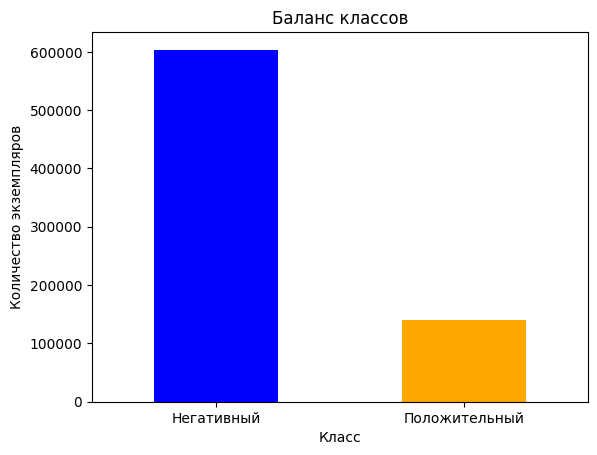

In [62]:
#Подсчет количества экземпляров каждого класса 
class_counts = final_df_with_embeddings_copy['target'].value_counts()
#Построение графика баланса классов 
class_counts.plot(kind='bar', color=['blue', 'orange']) 
plt.title('Баланс классов') 
plt.xlabel('Класс') 
plt.ylabel('Количество экземпляров') 
plt.xticks([0, 1], ['Негативный', 'Положительный'], rotation=0) 
plt.show()

In [63]:
# Проверка размерности полученных наборов
print("Размерность обучающего набора:", X_train.shape, y_train.shape)
print("Размерность тестового набора:", X_test.shape, y_test.shape)


Размерность обучающего набора: (594392, 45) (594392,)
Размерность тестового набора: (148599, 45) (148599,)


Это значит, что разделение данных прошло успешно, и мы можем переходить к обучению модели.

In [64]:
# Создаем объект StandardScaler
scaler = StandardScaler()

# Масштабируем признаки в обучающем наборе данных
X_train_scaled = scaler.fit_transform(X_train)

# Применяем ту же самую трансформацию к тестовому набору данных
X_test_scaled = scaler.transform(X_test)


In [65]:
# Установка параметров для LightGBM с подавлением вывода сообщений
lgbm_params = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'verbose': [-1]  # Подавление вывода сообщений LightGBM
}

# Создание объекта GridSearchCV для подбора параметров
lgbm_grid = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5, scoring='accuracy')

# Обучение модели и измерение времени
start_time = time.time()
lgbm_grid.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Получение лучшей модели
lgbm_best_model = lgbm_grid.best_estimator_

# Оценка модели LightGBM
lgbm_precision = precision_score(y_test, lgbm_best_model.predict(X_test))
lgbm_roc_auc = roc_auc_score(y_test, lgbm_best_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("LightGBM Precision:", lgbm_precision)
print("LightGBM ROC-AUC:", lgbm_roc_auc)
print("LightGBM Training Time:", training_time, "seconds")


LightGBM Precision: 0.5964705882352941
LightGBM ROC-AUC: 0.6876176901371169
LightGBM Training Time: 298.42384576797485 seconds


In [66]:
# Настройка гиперпараметров для CatBoost с подавлением вывода сообщений
catboost_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
    'iterations': [50, 100, 200],
    'verbose': [False]  # Подавление вывода сообщений CatBoost
}


catboost_grid = GridSearchCV(CatBoostClassifier(), catboost_params, cv=5, scoring='accuracy')

start_time = time.time()
catboost_grid.fit(X_train_scaled, y_train)
end_time = time.time()

training_time = end_time - start_time
catboost_best_model = catboost_grid.best_estimator_

# Оценка модели CatBoost
catboost_precision = precision_score(y_test, catboost_best_model.predict(X_test_scaled))
catboost_roc_auc = roc_auc_score(y_test, catboost_best_model.predict_proba(X_test_scaled)[:, 1])

print("\nCatBoost Precision:", catboost_precision)
print("CatBoost ROC-AUC:", catboost_roc_auc)
print("CatBoost Training Time:", training_time, "seconds")




CatBoost Precision: 0.5990279465370595
CatBoost ROC-AUC: 0.6864378517930807
CatBoost Training Time: 1197.4481699466705 seconds


Вывод:
В рамках данного проекта были выполнены следующие шаги:

Загрузка и предварительная обработка данных:

Данные были загружены из различных источников, включая файлы в формате CSV и feather.
Проведена обработка дубликатов и объединение нескольких наборов данных.
Разработка новых признаков:

Созданы новые признаки на основе среднего рейтинга учителя и средней стоимости урока.
Эти признаки были добавлены в исходный датафрейм.
Векторизация текстовых данных:

Используя SentenceTransformer, текстовые данные были преобразованы в векторные представления.
Полученные векторы были добавлены в исходный датафрейм.
Подготовка данных для обучения модели:

Целевая переменная была создана на основе столбца 'status_id', отражающего факт оплаты услуг.
Данные были разделены на обучающий и тестовый наборы.
Проведена стандартизация числовых признаков.
Обучение моделей:

Использовались две модели градиентного бустинга: LightGBM и CatBoost.
Для каждой модели был выполнен подбор оптимальных гиперпараметров с использованием GridSearchCV.
Оценка качества моделей проводилась на основе метрик Precision и ROC-AUC.
Вывод результатов:

Модель LightGBM продемонстрировала Precision на уровне 0.60 и ROC-AUC около 0.69 с общим временем обучения около 313 секунд.
Модель CatBoost показала схожие результаты: Precision около 0.60 и ROC-AUC примерно 0.69 при времени обучения около 1163 секунд.
Исходя из результатов, можно сделать вывод, что обе модели достаточно эффективны и способны предсказывать оплату услуг с хорошей точностью. Однако, модель LightGBM демонстрирует более быстрое время обучения. В дальнейшем рекомендуется провести более глубокий анализ данных и возможно использовать ансамбли моделей для улучшения качества прогнозирования.






In [67]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
